# Project 2: Movie Recommendation System (Work in Groups)

You have designed a Web site about movies where people can find information about different movies, while they can also give ratings to movies they have seen and they can get recommendations for movies they have not seen yet.

You have scrapped information about numerous movies from the Web. Over some time, people have been using the site, so by now you have quite some ratings in your database, and you feel ready to implement the first version of your movie recommendation system!

You have two types of data to work with. On one hand you have information (metadata) about the movies themselves. Each movie is identified by a unique ID number, and for each movie you have the following information:

- *title*,  a string that contains the title of the movie
- *year*,   an integer number that contains the year when the movie was produced
- *genres*, a list of strings. Each string is the name of one genre, like for example 'Action', 'Crime', 'Drama', etc. The number of genres associated with each movie is variable

You only have data for 9,730 movies, although the IDs range from 1 to ~193,610. This means that you do not have metadata for ALL movies, just for a small part.

Here's some sample information for a few movies:

|Movie ID |Title                                                 | Year | Genres                          |
|:------: |:-----------------------------------------------------|:----:|:--------------------------------------------------|
|4220     | Longest Yard, The                                    | 1974 | ['Comedy']|
|4221     | Necessary Roughness                                  | 1991 | ['Comedy']|
|4223     | Enemy at the Gates                                   | 2001 | ['Drama', 'War']|
|4224     | Exit Wounds                                          | 2001 | ['Action', 'Thriller']|
|4225     | Dish, The                                            | 2001 | ['Comedy']|
|4226     | Memento                                              | 2000 | ['Mystery', 'Thriller']|
|4228     | Heartbreakers                                        | 2001 | ['Comedy', 'Crime', 'Romance']|
|4229     | Say It Isn't So                                      | 2001 | ['Comedy', 'Romance']|
|4231     | Someone Like You                                     | 2001 | ['Comedy', 'Romance']|
|4232     | Spy Kids                                             | 2001 | ['Action', 'Adventure', 'Children', 'Comedy']|
|4233     | Tomcats                                              | 2001 | ['Comedy']|
|4234     | Tailor of Panama, The                                | 2001 | ['Drama', 'Thriller']|
|4235     | Amores Perros (Love's a Bitch)                       | 2000 | ['Drama', 'Thriller']|
|4236     | Keep the River on Your Right: A Modern Cannibal Tale | 2000 | ['Documentary']|

In parallel, you have obtained ratings for quite some movies already. The ratings are basically provided as a table, where the rows correspond to users and the columns to movies (movieIds). The format is as follows:

|   |1|2|3|4|7|8|10|12|...|193606|193607|193609|193610|
|:---|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0|0|0|0|0|0|0|0|...|0|0|0|0|
|1|0|0|0|0|0|0|0|0|...|0|0|0|0|
|2|0|0|0|0|0|0|0|0|...|0|0|0|0|
|3|0|0|0|0|0|0|0|0|...|0|0|0|0|
|4|0|0|0|0|0|0|0|0|...|0|0|0|0|
|5|0|0|0|0|0|0|0|0|...|0|0|0|0|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|...|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|605|0|0|0|0|0|0|0|0|...|0|0|0|0|
|607|0|0|0|0|0|0|0|0|...|0|0|0|0|
|608|0|0|0|0|0|0|0|0|...|0|0|0|0|
|609|0|0|0|0|0|0|0|0|...|0|0|0|0|
|610|0|0|0|0|0|0|0|0|...|0|0|0|0|

You have ratings from 611 users. The ratings table has been filtered, and contains only movies for which at least 3 ratings are available. You are given have information for 4,131 movies.

We will get you started with opening and loading the data into Pandas structures. Then you will have to respond to a few questions that involve EXPLORING the data and understanding well the information you have been given and how it is structured, before you implement a funcional recommendation system, and you apply it to obtain ratings for the movies of a new user.

<br>

First, let's open the data files we have been given. The data is given in two file called *movies* and *ratings*. These are Python *pickle* files. Read here about pickle files: https://docs.python.org/3/library/pickle.html

We will use Pandas method `read_pickle()` to open the files. Read more here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html

## Read the Movies Information

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load Movie Data
movies = pd.read_pickle("movies")
movies.head()

,title,year,genres
movieId,,,
1,Toy Story,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,Jumanji,1995,"[Adventure, Children, Fantasy]"
3,Grumpier Old Men,1995,"[Comedy, Romance]"
4,Waiting to Exhale,1995,"[Comedy, Drama, Romance]"
5,Father of the Bride Part II,1995,[Comedy]


The Movies are indexed based on the `movieId`. Let's see a summary of what the movies dataframe contains:

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9730 entries, 1 to 193609
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9730 non-null   object
 1   year    9730 non-null   int64 
 2   genres  9730 non-null   object
dtypes: int64(1), object(2)
memory usage: 304.1+ KB


Note that we have 9730 entries (rows), but their IDs range from 1 to 193609... We do not have information for all movies, just for 9730 of them.

The indices of the Movies dataframe are the Movie IDs. So there might be movies missing here! Let's retrieve a couple of rows. See the difference between the two lines below (and you if do not understand it, check the documentation of `loc` and `iloc`!).

In [4]:
print("Details of the movie with Movie ID: 2314")
print(movies.loc[2314])

print("\nDetails of the movie at the dataframe's row: 2314")
print(movies.iloc[2314])

Details of the movie with Movie ID: 2314
title     Beloved
year         1998
genres    [Drama]
Name: 2314, dtype: object

Details of the movie at the dataframe's row: 2314
title     Women on the Verge of a Nervous Breakdown (Muj...
year                                                   1988
genres                                      [Comedy, Drama]
Name: 3067, dtype: object


Let's print details for a few of the movies:

In [5]:
movies.loc[4200:4210]

,title,year,genres
movieId,,,
4200,Double Impact,1991,[Action]
4202,Fuzz,1972,[Drama]
4203,Harley Davidson and the Marlboro Man,1991,"[Action, Crime, Drama]"
4204,Losin' It,1983,[Comedy]
4205,Mermaids,1990,"[Comedy, Drama, Romance]"
4207,Navy Seals,1990,"[Action, Adventure, War]"
4210,Manhunter,1986,"[Action, Crime, Drama, Horror, Thriller]"


We can also search for movies by title, for example

In [6]:
movies[movies["title"].str.contains("Star Wars")]

,title,year,genres
movieId,,,
260,Star Wars: Episode IV - A New Hope,1977,"[Action, Adventure, Sci-Fi]"
1196,Star Wars: Episode V - The Empire Strikes Back,1980,"[Action, Adventure, Sci-Fi]"
1210,Star Wars: Episode VI - Return of the Jedi,1983,"[Action, Adventure, Sci-Fi]"
2628,Star Wars: Episode I - The Phantom Menace,1999,"[Action, Adventure, Sci-Fi]"
5378,Star Wars: Episode II - Attack of the Clones,2002,"[Action, Adventure, Sci-Fi, IMAX]"
33493,Star Wars: Episode III - Revenge of the Sith,2005,"[Action, Adventure, Sci-Fi]"
61160,Star Wars: The Clone Wars,2008,"[Action, Adventure, Animation, Sci-Fi]"
79006,Empire of Dreams: The Story of the 'Star Wars'...,2004,[Documentary]
122886,Star Wars: Episode VII - The Force Awakens,2015,"[Action, Adventure, Fantasy, Sci-Fi, IMAX]"


In [7]:
movies[movies["title"] == "Star Trek"]

,title,year,genres
movieId,,,
68358,Star Trek,2009,"[Action, Adventure, Sci-Fi, IMAX]"


To get the id of a movie (which is the value in the indices column)

In [8]:
movies.index[movies["title"] == "Star Trek"][0] # The last zero is necessary to return the value. Otherwise we would get the list of indices that match this condition, that in this case only contains one element

68358

## Read the Ratings Information

The second piece of information we have imported is ratings.

In [9]:
# Load Ratings Data
ratings = pd.read_pickle("ratings")
ratings.head()

,1,2,3,4,5,6,7,8,9,10,...,179401,179819,180031,180985,182823,183897,185029,187541,187593,187595
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The ratings are indexed with just a range index (a continuous range of integers). Let's get some more info on our ratings table

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Columns: 4131 entries, 1 to 187595
dtypes: float64(4131)
memory usage: 19.3 MB


So, this dataframe is in essense a 2-dimensional array, with 611 rows (as expected, this corresponds to the number of users) and 4,131 columns (corresponding to movie IDs). Again, not all movies are represented here. These ratings have been filtered to contain only movies for which at least 3 ratings have been received.

The next thing to look at is what a single row or column looks like. Each row corresponds to a different user, what we expect is to see 4,131 values, which should be the ratings this user has given to the different movies. Each column corresponds to a different movie, what we expect to see is 611 values, which are the ratings different users have given to this movie.

In [11]:
print(ratings.loc[40]) # Ratings of some random user

1         5.0
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
183897    NaN
185029    NaN
187541    NaN
187593    NaN
187595    NaN
Name: 40, Length: 4131, dtype: float64


In [12]:
print(ratings[2408]) # Ratings for some random movie

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Name: 2408, Length: 611, dtype: float64


It seems like we have a lot of N/A numbers in there. To get a better idea of the ratings table, we could plot the contents as an image. We can use MatplotLib's `imshow()` function to do that. Each pixel in this image will have a value (color) that corresponds to the rating a particular user (y) has given to this particular movie (x). We will do it for the first 2000 movies (so it will be an image of 2000 x 611 pixels).

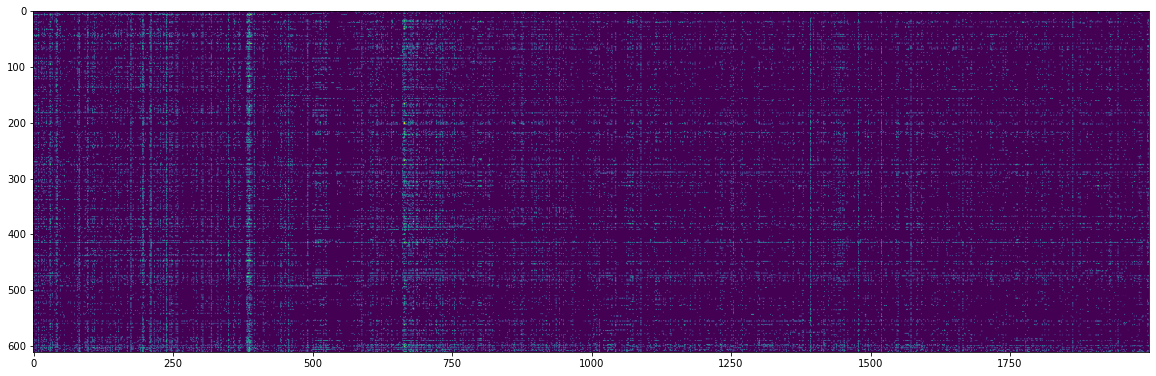

In [13]:
mvArray = ratings.iloc[:, :2000].to_numpy() # Get all the rows and the first 2000 columns, and convert to a numpy array
mvArray = np.nan_to_num(mvArray) # change all n/a values to zeros
plt.figure(figsize = (20,20))
plt.imshow(mvArray) # Plot an image of the ratings array (first 2000 movies)

Now we can visualise the situation much better. Ratings are very sparse... only a few movies have been rated by each user.

Let's see how many ratings do we have per movie - we want to count the valid entries (not N/A) in every column. We can do so using the DataFrame's function `count()`

In [14]:
ratingsPerMovie = ratings.count() # We count column wise (to count row wise we should pass the argument axis = 1)
ratingsPerMovie

1         214
2         109
3          51
4           7
5          48
         ... 
183897      5
185029      4
187541      4
187593     12
187595      5
Length: 4131, dtype: int64

An easy way to visualise how many ratings are usually provided per movie is to plot a histogram. We will use the matplotlib function `hist()`:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

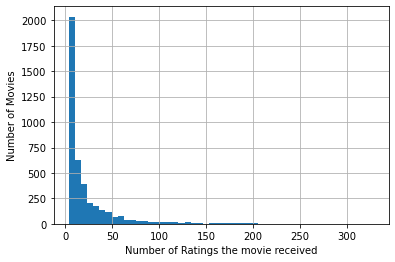

In [15]:
ratingsPerMovie.hist(bins = 50)

#plt.hist(ratingsPerMovie, bins = 50) # alternatively

plt.xlabel("Number of Ratings the movie received")
plt.ylabel("Number of Movies")
plt.show()

<span style="color:blue">

### Question 1

We calculated before the histogram of ratings per movie. Now calculate and display the histogram of number of ratings versus number of users.
</span>

In [16]:
# YOUR CODE HERE

<span style="color:blue">

### Question 2
    
For how many movies have we received more than 250 ratings? Print out the information we have for these movies
    
</span>

In [17]:
# YOUR CODE HERE

<span style="color:blue">

### Question 3:
    
What year was the movie "Alien" made in?
    
What is the min, max and median rating the movie has received?
    
How many people have rated this movie?
    
</span>

In [18]:
# YOUR CODE HERE


<span style="color:blue">

### Question 4
    
How many horror movies do we have in the dataset?
    
> Hint 1: You can iterate over rows in a DataFrame by using the function `iterrows()`
    
> Hint 2: You can check if an element is in a list by using the keyword `in`
    
</span>

In [19]:
# YOUR CODE HERE


<span style="color:blue">
    
### Question 5
    
How many movies per category (genre) do we have in the dataset? Make a bar plot of the movies per category

> Hint: look at the `plt.bar()` function https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
    
</span>

In [20]:
# YOUR CODE HERE


<span style="color:blue">

### Question 6
    
Print out the list of all movies that contain "Star" in their title and where made after 2005, sorted alphabetically

> Hint: you can use the `sort_values()` method of Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
    
</span>

In [21]:
# YOUR CODE HERE


<span style="color:blue">
    
### Question 7
    
Who is the user (give the user id) who has rated the most movies?
    
</span>

In [22]:
# YOUR CODE HERE


<span style="color:blue">

### Question 8: 
    
Which of the Indiana Jones movies has the worst average rating?

> Hint: You can search for all the Indiana Jones movies by checking if they contain "Indiana" in the title
    
</span>

In [23]:
# YOUR CODE HERE


## Recommendation systems

A new user has rated a few movies already, so you can now recommend new movies for him. The ratings of the new (target) user are the following:

In [24]:
target = pd.read_pickle("target")

First, check what `target` looks like:

In [25]:
target

1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
183897   NaN
185029   NaN
187541   NaN
187593   NaN
187595   NaN
Length: 4131, dtype: float64

This is a row of 4,131 ratings (like any of the other users we have), and it seems like most ratings are n/a - this is a new user, just starting to watch some movies. We will print out all the non-zero ratings of this user, to see what kind of movies he has watched, and what he likes.

In [26]:
# Let's see what the target user likes and dislikes

idx = target.index[target.isna() == False]

targetRatedMovies = pd.DataFrame(movies.loc[idx, "title"])
targetRatedMovies['rating'] = target.loc[idx]
targetRatedMovies

,title,rating
32,Twelve Monkeys (a.k.a. 12 Monkeys),5.0
76,Screamers,1.0
208,Waterworld,2.0
260,Star Wars: Episode IV - A New Hope,4.0
329,Star Trek: Generations,4.0
780,Independence Day (a.k.a. ID4),2.0
1127,"Abyss, The",4.0
1200,Aliens,4.0
1240,"Terminator, The",5.0
1270,Back to the Future,5.0


Ok - we seem to have a science fiction lover here.

<span style="color:blue">

### Question 9
    
Use collaborative filtering to derive the ratings for the movies that the target user has not yet rated.
    
In order to calcualte the similarity between two users we need then to have at least a few movies in common. For this reason, you should use in your collaborative filtering only users that have ranked at least 3 of the movies that the target has seen. We give you the way to extract these users below:
    
</span>

In [27]:
filtered_ratings = ratings[ratings[idx].count(axis = 1) > 3]
filtered_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 610
Columns: 4131 entries, 1 to 187595
dtypes: float64(4131)
memory usage: 5.8 MB


<span style="color:blue">

You see that out of the 611 users we had, only 183 have at least 3 movies in common with the target. Base your calculations on these `filtered_ratings`
    
</span>

In [28]:
# YOUR CODE HERE


<span style="color:blue">

### Question 10
    
What is the rating for the movies 'Johnny Mnemonic', 'Jurassic Park', 'Sense and Sensibility', 'Copycat', 'Braveheart'?
    
</span>

In [29]:
# YOUR CODE HERE
